# Main Focus of the Notebook: Plotting the filtered Tracks with different Lifetime Cohorts and Cummulative Plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys 
sys.path.append('../src/')
from intensity_time_plots import filter_track_ids_by_length_ranges, random_track_ids
from intensity_time_plots import intensity_time_plot, createBufferForLifetimeCohort
from intensity_time_plots import createBufferForLifetimeCohort_normalized, cumulative_plots

In [2]:
track_df = pd.read_pickle('/Users/apple/Desktop/Akamatsu_Lab/Lap_track/Final/data/track_df_updated.pkl')
filtered_tracks = pd.read_pickle('/Users/apple/Desktop/Akamatsu_Lab/Lap_track/Final/data/filtered_tracks.pkl')

### The following function takes in our dataframe and returns track id arrays for the defined length ranges. The length ranges are defined and can be altered as per requirement

In [3]:
custom_length_ranges = [[5, 10], [11,15], [16, 25], [26, 35], [36, 45], [46, 60]]
track_id_arrays = filter_track_ids_by_length_ranges(dataframe = filtered_tracks, track_length_buckets = custom_length_ranges, 
                                 track_id_col_name = 'track_id', track_length_col_name = 'track_length')

In [4]:
print(f'number of tracks between [5,10] inclusive are {len(track_id_arrays[0])}')
print(f'number of tracks between [11,15] inclusive are {len(track_id_arrays[1])}')
print(f'number of tracks between [16,25] inclusive are {len(track_id_arrays[2])}')
print(f'number of tracks between [26,35] inclusive are {len(track_id_arrays[3])}')
print(f'number of tracks between [36,45] inclusive are {len(track_id_arrays[4])}')
print(f'number of tracks between [46,60] inclusive are {len(track_id_arrays[5])}')

number of tracks between [5,10] inclusive are 36
number of tracks between [11,15] inclusive are 71
number of tracks between [16,25] inclusive are 68
number of tracks between [26,35] inclusive are 20
number of tracks between [36,45] inclusive are 10
number of tracks between [46,60] inclusive are 4


### The following function selects random track ids of a desired length 

In [5]:
random_tracks = random_track_ids(dataframe = filtered_tracks, desired_length = [5,10], 
                                 track_length_col_name = 'track_length', track_id_col_name = 'track_id', 
                                num_to_select = 64)

# Plotting 64 tracks of length between 5 and 10 inclusive 

### The amplitude used for plotting is mean amplitude from both channels. Peaks or Voxel sum can be used for plotting by slightly tweaking the code

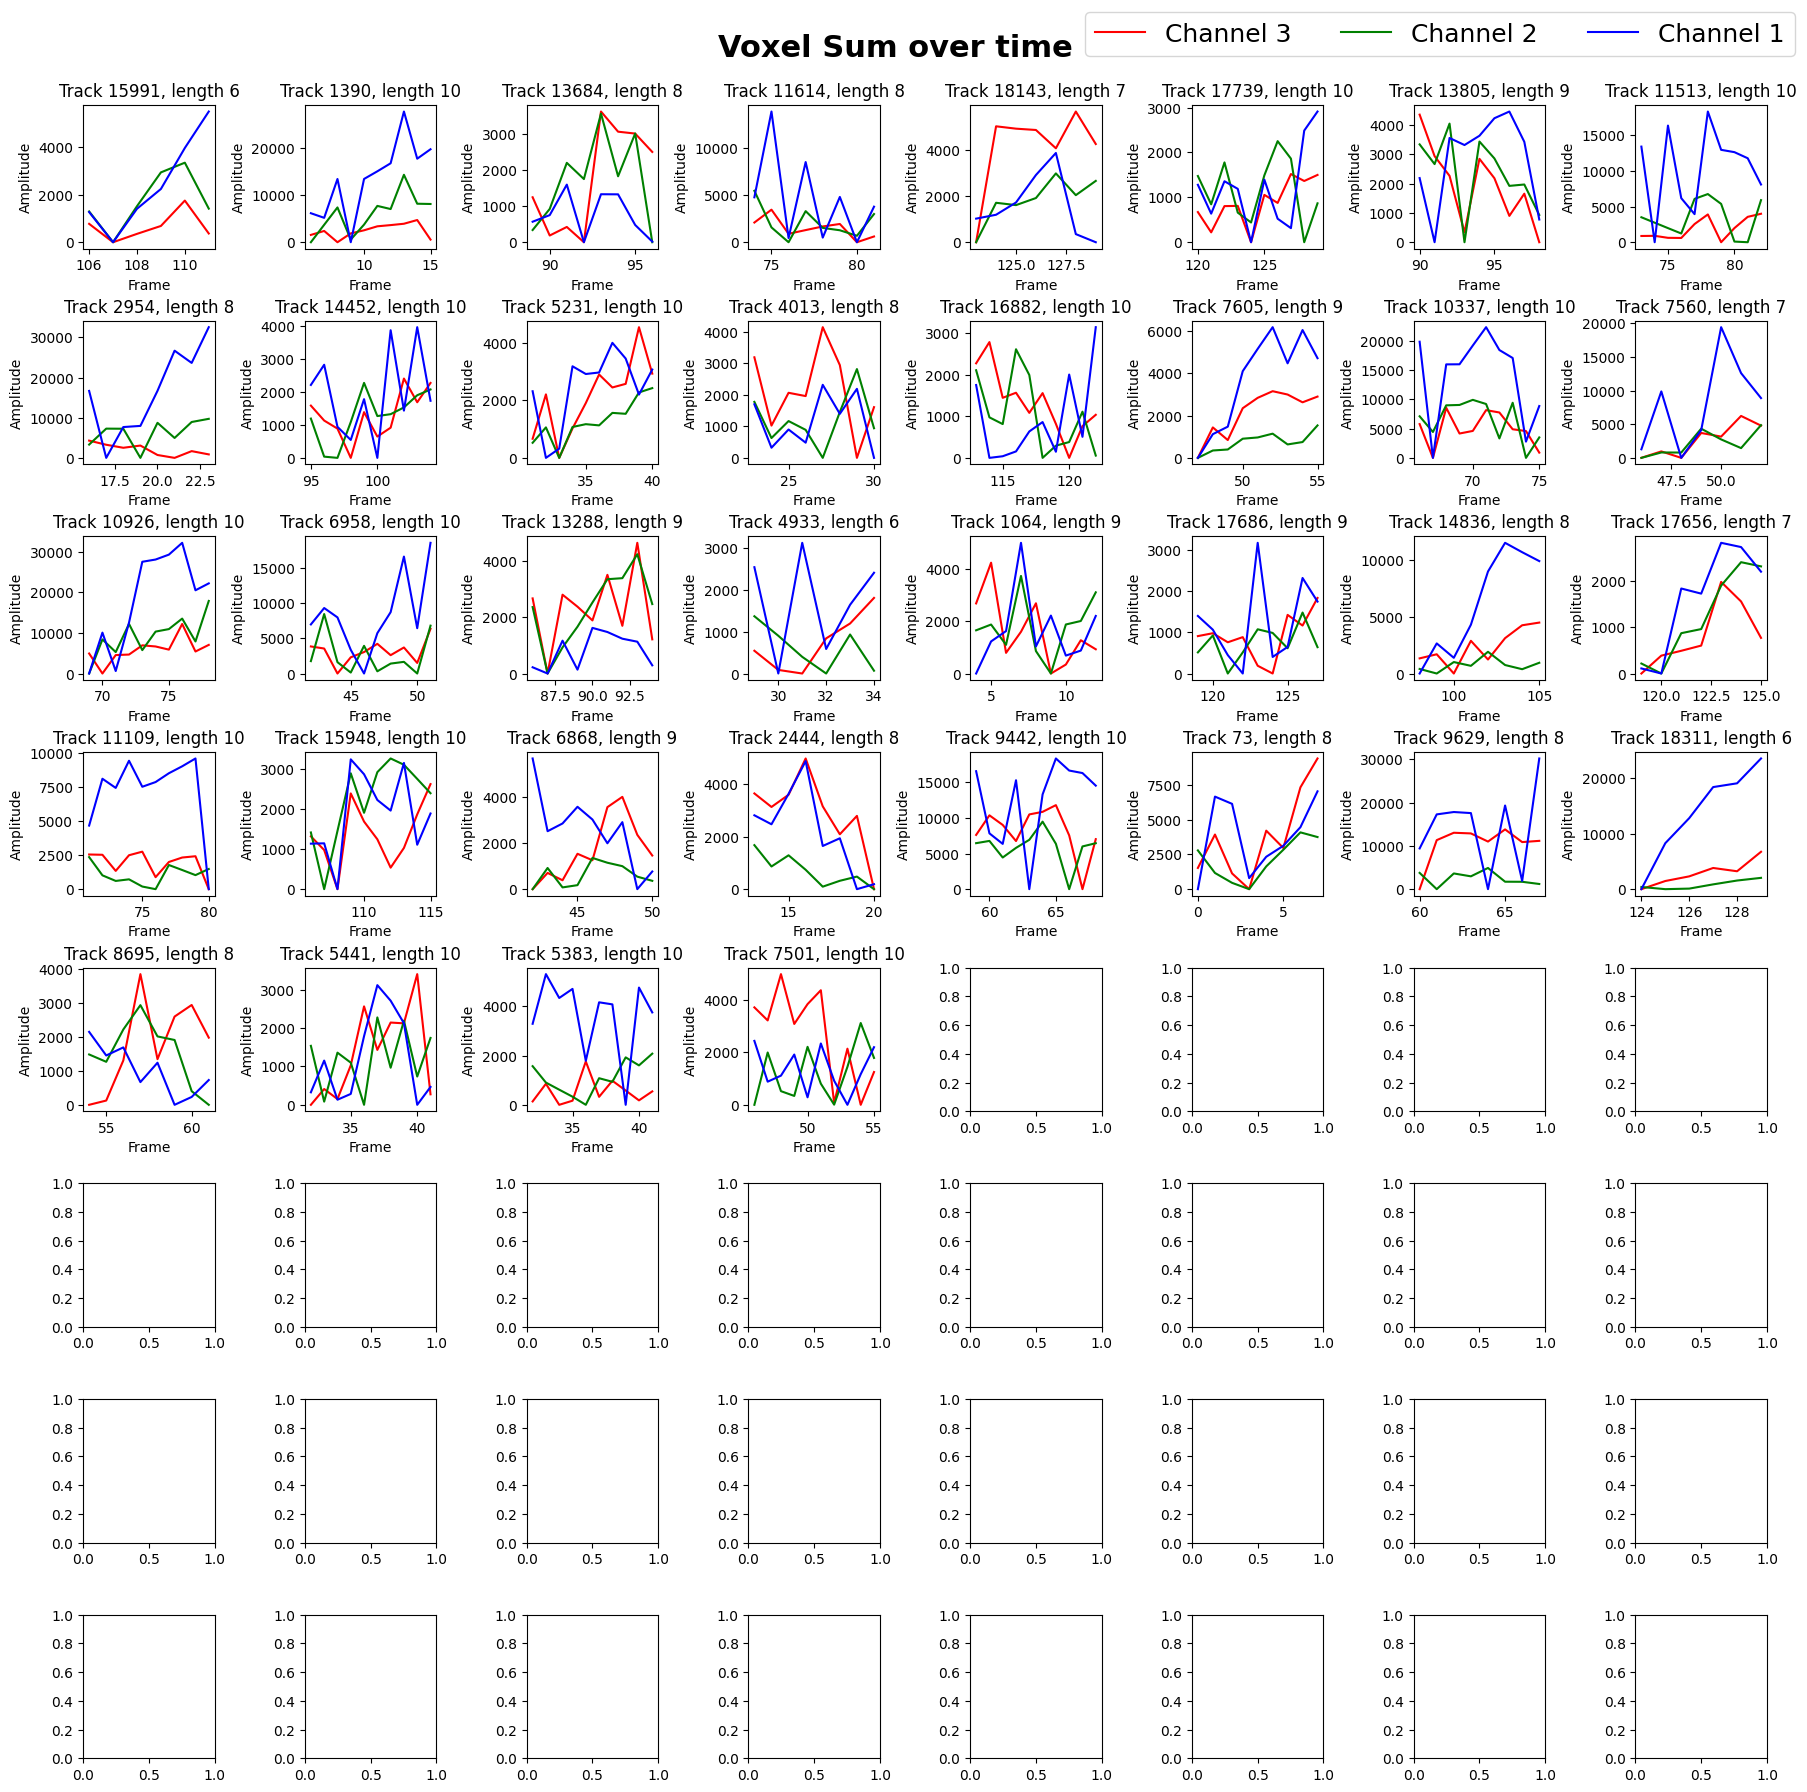

In [6]:
intensity_time_plot(dataframe = track_df, tracks_to_plot = random_tracks, 
intensity_to_plot = ['c3_voxel_sum','c2_voxel_sum', 'c1_voxel_sum'], track_id_col_name = 'track_id', 
frame_col_name = 'frame', channels_to_plot = 3, legend_values = ['Channel 3', 'Channel 2', 'Channel 1'],
line_colors = ['red', 'green', 'blue'], graph_title = 'Voxel Sum')

# Plotting 64 tracks between length 11 and 15 inclusive 

In [7]:
random_tracks_2 = random_track_ids(dataframe = filtered_tracks, desired_length = [11,15], 
                                 track_length_col_name = 'track_length', track_id_col_name = 'track_id', 
                                num_to_select = 64)

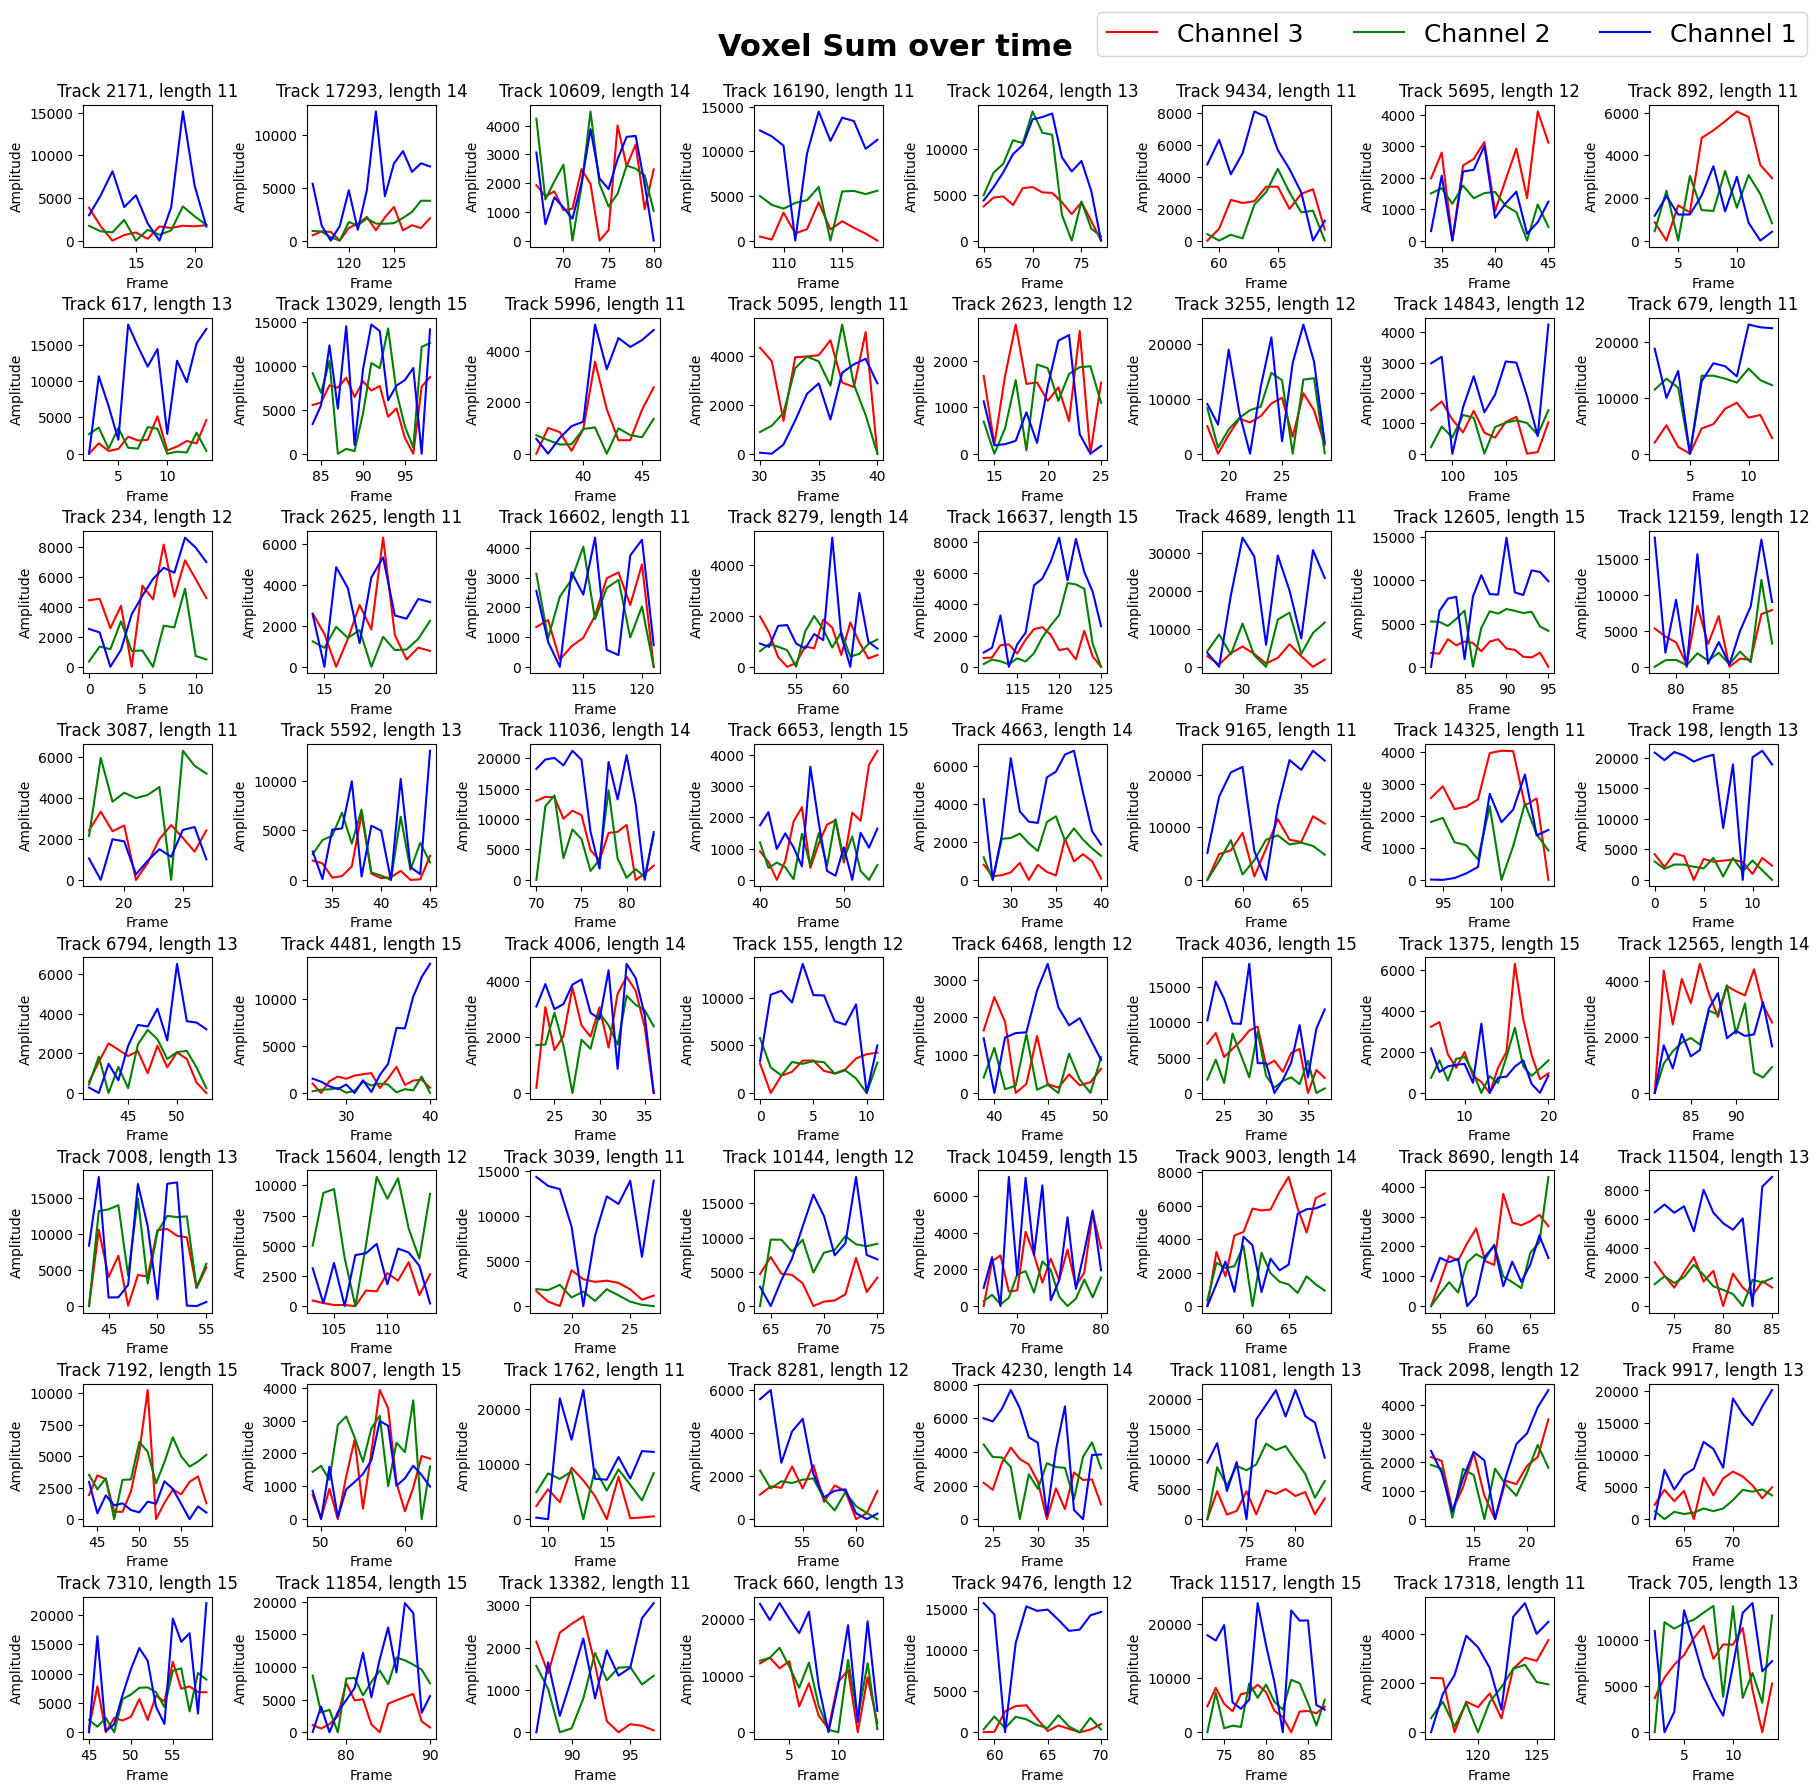

In [8]:
intensity_time_plot(dataframe = track_df, tracks_to_plot = random_tracks_2, 
intensity_to_plot = ['c3_voxel_sum','c2_voxel_sum', 'c1_voxel_sum'], track_id_col_name = 'track_id', 
frame_col_name = 'frame', channels_to_plot = 3, legend_values = ['Channel 3', 'Channel 2', 'Channel 1'],
line_colors = ['red', 'green', 'blue'], graph_title = 'Voxel Sum')

# Plotting 64 tracks between length 16 and 25 inclusive

In [9]:
random_tracks_3 = random_track_ids(dataframe = filtered_tracks, desired_length = [16,25], 
                                 track_length_col_name = 'track_length', track_id_col_name = 'track_id', 
                                num_to_select = 64)

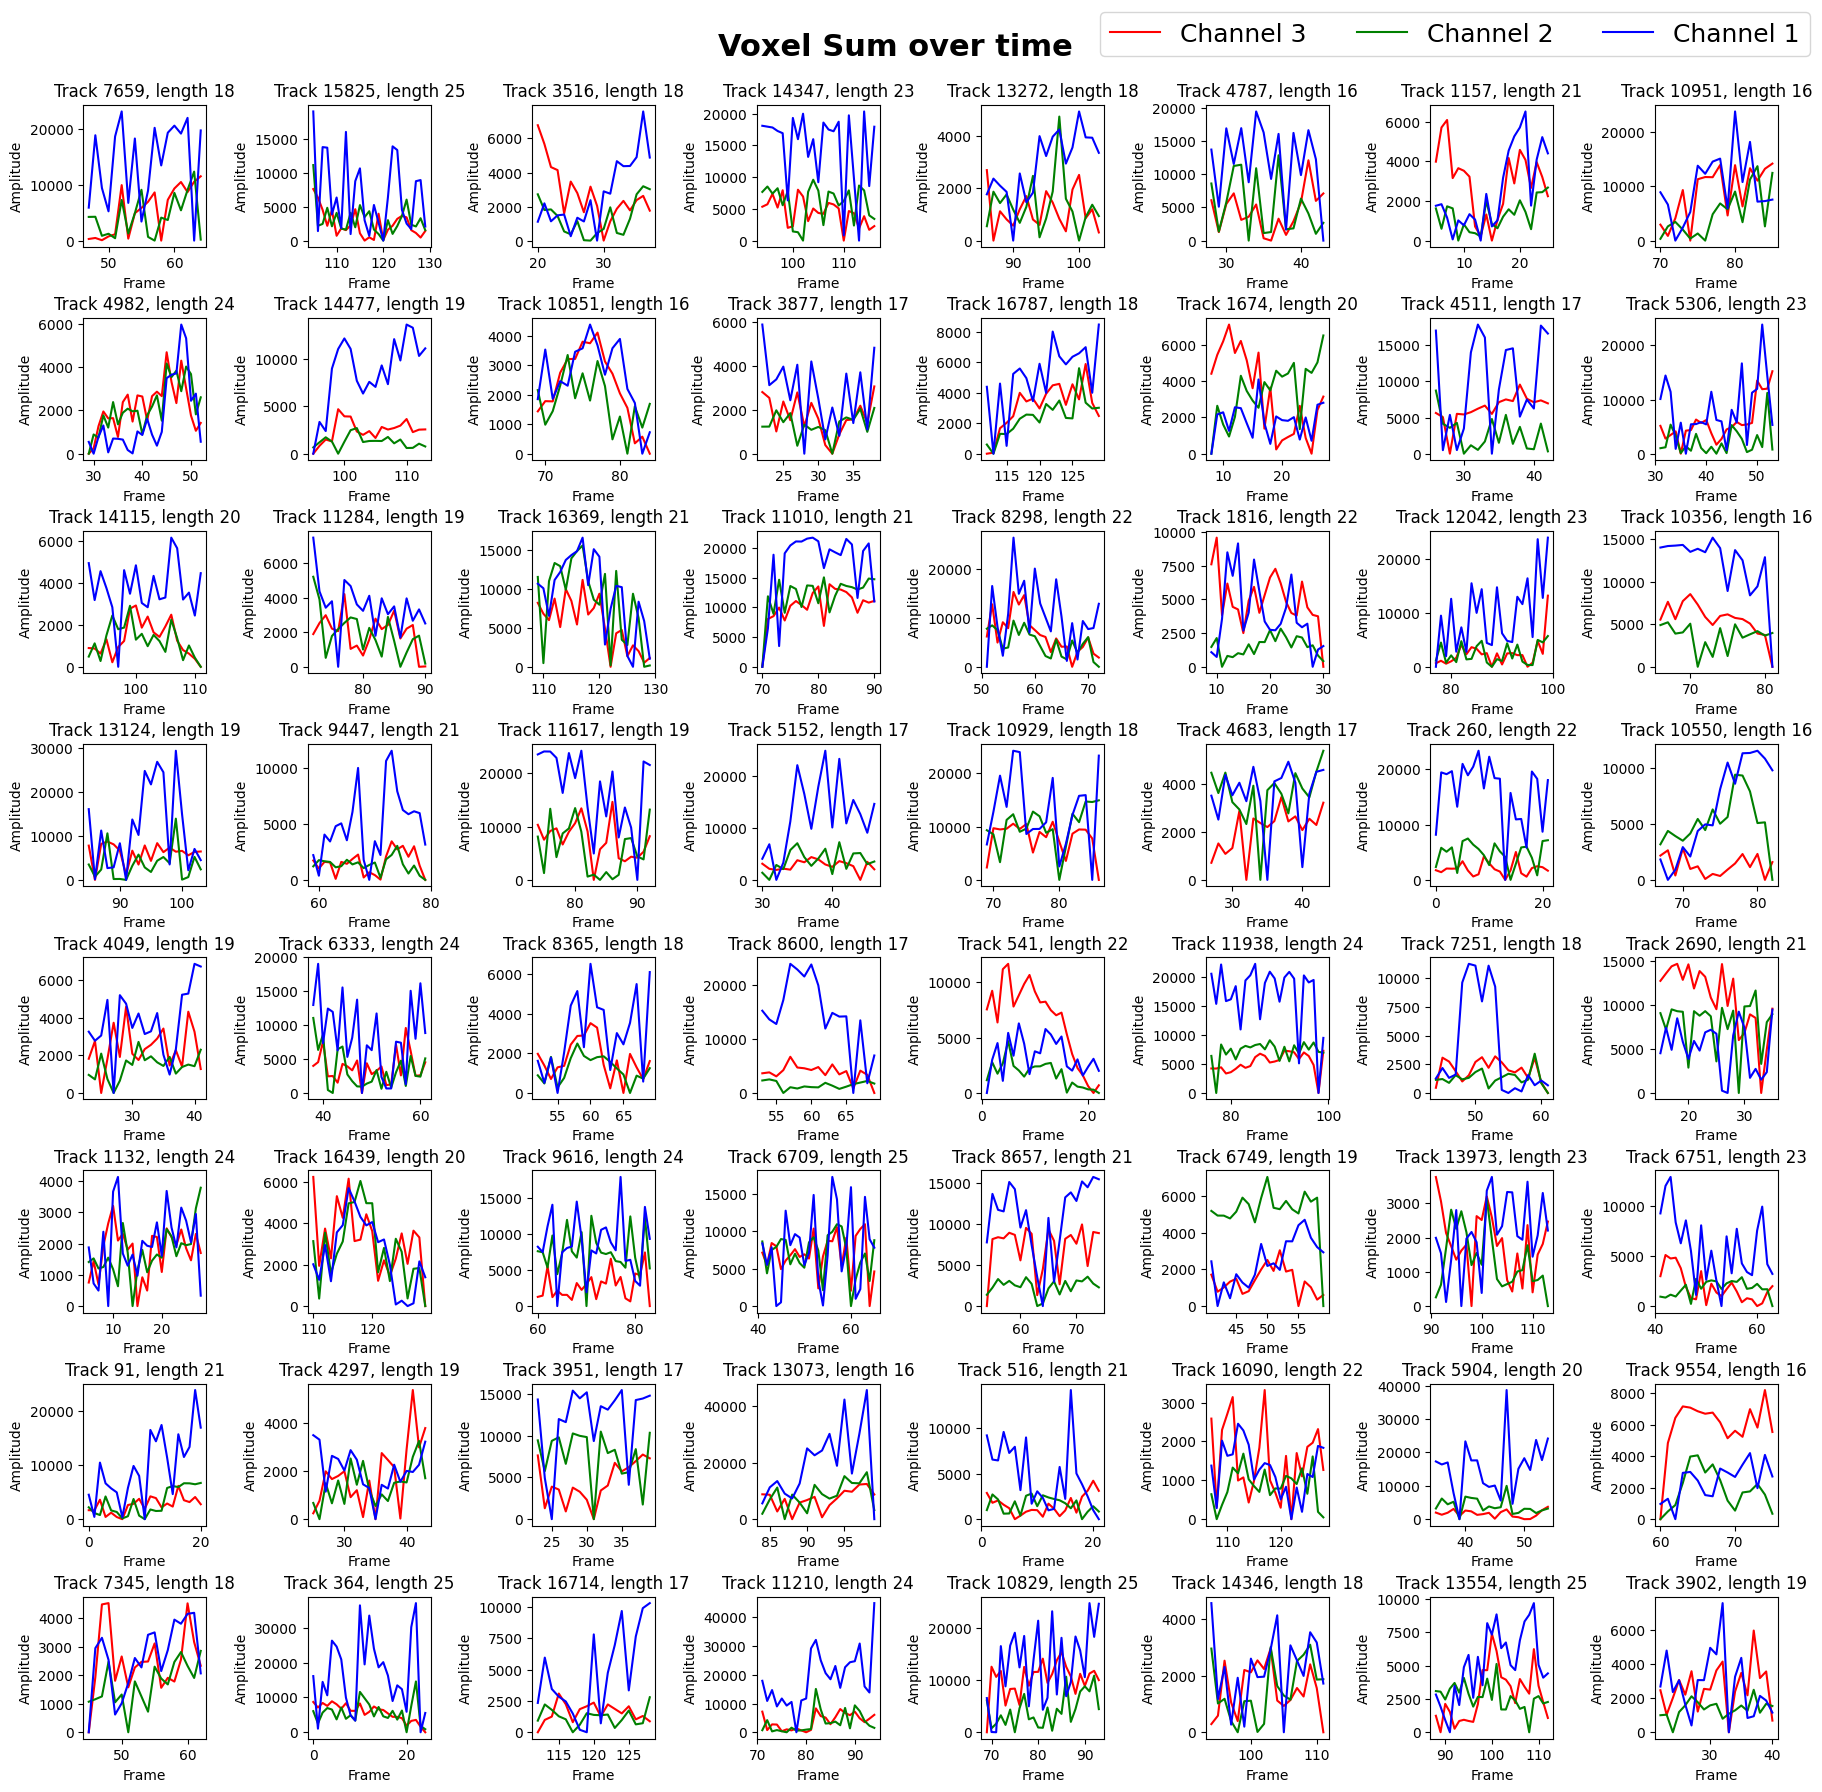

In [10]:
intensity_time_plot(dataframe = track_df, tracks_to_plot = random_tracks_3, 
intensity_to_plot = ['c3_voxel_sum','c2_voxel_sum', 'c1_voxel_sum'], track_id_col_name = 'track_id', 
frame_col_name = 'frame', channels_to_plot = 3, legend_values = ['Channel 3', 'Channel 2', 'Channel 1'],
line_colors = ['red', 'green', 'blue'], graph_title = 'Voxel Sum')

# The following function creates a buffer to align tracks by their peak value 

In [ ]:
primary_buffer, secondary_buffer, tertiary_buffer = createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[2], backgroundIntensity = [170,160,220], 
intensity_to_plot = ['amplitude','c2_peak', 'c1_peak'], track_id_col_name = 'track_id')

In [ ]:
plt.figure(dpi=300)
plt.title('clathrin')
plt.imshow(primary_buffer)

In [ ]:
plt.figure(dpi=300)
plt.title('dynamin')
plt.imshow(secondary_buffer)

In [ ]:
plt.figure(dpi=300)
plt.title('actin')
plt.imshow(tertiary_buffer)

## Initial Cohort Plots without Normalization 

**Length between 5 to 10 frames**

In [ ]:
primary_buffer, secondary_buffer, tertiary_buffer  = createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[0], backgroundIntensity = [170,160,240], 
intensity_to_plot = ['amplitude','c2_peak', 'c1_peak'], track_id_col_name = 'track_id')

cumulative_plots(primary_buffer = primary_buffer, secondary_buffer = secondary_buffer, 
tertiary_buffer = tertiary_buffer, background_intensity= [170,160,240], time_shift = 30, framerate_msec = 2.3*1000)

**Length between 11-15 frames**

In [ ]:
primary_buffer, secondary_buffer, tertiary_buffer  = createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[1], backgroundIntensity = [170,160,240], 
intensity_to_plot = ['amplitude','c2_peak', 'c1_peak'], track_id_col_name = 'track_id')

cumulative_plots(primary_buffer = primary_buffer, secondary_buffer = secondary_buffer, 
tertiary_buffer = tertiary_buffer, background_intensity= [170,160,240], time_shift = 30, framerate_msec = 2.3*1000)

**Length between 16-25 frames**

In [ ]:
primary_buffer, secondary_buffer, tertiary_buffer  = createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[2], backgroundIntensity = [170,160,240], 
intensity_to_plot = ['amplitude','c2_peak', 'c1_peak'], track_id_col_name = 'track_id')

cumulative_plots(primary_buffer = primary_buffer, secondary_buffer = secondary_buffer, 
tertiary_buffer = tertiary_buffer, background_intensity= [170,160,240], time_shift = 30, framerate_msec = 2.3*1000)

**Length between 26-35 frames**

In [ ]:
primary_buffer, secondary_buffer, tertiary_buffer  = createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[3], backgroundIntensity = [170,160,240], 
intensity_to_plot = ['amplitude','c2_peak', 'c1_peak'], track_id_col_name = 'track_id')

cumulative_plots(primary_buffer = primary_buffer, secondary_buffer = secondary_buffer, 
tertiary_buffer = tertiary_buffer, background_intensity= [170,160,240], time_shift = 30, framerate_msec = 2.3*1000)

**Length between 36-45 frames**

In [ ]:
primary_buffer, secondary_buffer, tertiary_buffer = createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[4], backgroundIntensity = [170,160,240], 
intensity_to_plot = ['amplitude','c2_peak', 'c1_peak'], track_id_col_name = 'track_id')

cumulative_plots(primary_buffer = primary_buffer, secondary_buffer = secondary_buffer, 
tertiary_buffer = tertiary_buffer, background_intensity= [170,160,240], time_shift = 100, framerate_msec = 2.3*1000)

**Length between 46-60 frames**

In [ ]:
#primary_buffer, secondary_buffer = createBufferForLifetimeCohort(dataframe = track_df ,
#listOfTrackIdsAssignedToCohort = track_id_arrays[5], backgroundIntensity = [170,160], 
#intensity_to_plot = ['amplitude','c2_peak'], track_id_col_name = 'track_id')

#cumulative_plots(primary_buffer = primary_buffer, secondary_buffer = secondary_buffer, 
#background_intensity= [170,160], time_shift = 110, framerate_msec = 2.3*1000)